In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2))) # plotting
suppressPackageStartupMessages(suppressWarnings(library(dplyr))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(argparser))) # command line arguments
suppressPackageStartupMessages(suppressWarnings(library(patchwork))) # plot patchwork
suppressPackageStartupMessages(suppressWarnings(library(reshape2))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(ggridges))) # ridgeline plots
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer))) # color palettes
suppressPackageStartupMessages(suppressWarnings(library(cowplot))) # ggplot2 drawing
suppressPackageStartupMessages(suppressWarnings(library(ggplotify))) # ggplot2 drawing
suppressPackageStartupMessages(suppressWarnings(library(grid()))) # ggplot2 drawing

source("../../utils/figure_themes.r")


## single cell predictions 

In [2]:
CELL_TYPE = "PBMC"

In [3]:
# define main_df_path
main_df_path = paste0("../results/", CELL_TYPE, "/","single_cell_predictions.parquet")

# read in data
main_df = arrow::read_parquet(main_df_path)
head(main_df)
unique(main_df$comparison)

oneb_Metadata_Treatment_Dose_Inhibitor_Dose,Metadata_Nuclei_Location_Center_Y,Metadata_Nuclei_Location_Center_X,group,Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1,Cytoplasm_AreaShape_Zernike_9_5,Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1,Metadata_Well,Metadata_Site,Metadata_ImageNumber,⋯,image_ER_path,image_GasderminD_path,image_AGP_path,image_Mitochondria_path,image_compsite_crop_path,image_DAPI_crop_path,image_ER_crop_path,image_GasderminD_crop_path,image_AGP_crop_path,image_Mitochondria_crop_path
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Disulfiram_1.000_uM_DMSO_0.025_%,1934.7651,204.7915,Control,-0.3668830,-0.6595971,1.7325933,F10,4,132,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_yellow_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_green_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_red_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_magenta_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_im1_im3_im4_composite_image_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_blue_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_yellow_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_green_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_red_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_magenta_channel_crop_cell.png
Thapsigargin_1.000_uM_DMSO_0.025_%,597.5306,1401.2653,Apoptosis,-0.8757575,0.7167819,1.7325879,D06,4,68,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_yellow_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_green_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_red_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_magenta_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/apoptosis__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_im1_im3_im4_composite_image_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/P

[1] "control_pyroptosis"   "apoptosis_control"    "apoptosis_pyroptosis"

In [4]:
# split the df by comparison
control_pyroptosis <- main_df %>% filter(comparison == "control_pyroptosis")    
apoptosis_control <- main_df %>% filter(comparison == "apoptosis_control")
apoptosis_pyroptosis <- main_df %>% filter(comparison == "apoptosis_pyroptosis")
length((control_pyroptosis$comparison))
length((apoptosis_control$comparison))
length((apoptosis_pyroptosis$comparison))

[1] 3

[1] 3

[1] 3

In [5]:
apoptosis_pyroptosis

oneb_Metadata_Treatment_Dose_Inhibitor_Dose,Metadata_Nuclei_Location_Center_Y,Metadata_Nuclei_Location_Center_X,group,Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1,Cytoplasm_AreaShape_Zernike_9_5,Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1,Metadata_Well,Metadata_Site,Metadata_ImageNumber,⋯,image_ER_path,image_GasderminD_path,image_AGP_path,image_Mitochondria_path,image_compsite_crop_path,image_DAPI_crop_path,image_ER_crop_path,image_GasderminD_crop_path,image_AGP_crop_path,image_Mitochondria_crop_path
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Disulfiram_1.000_uM_DMSO_0.025_%,1004.3040,1408.7102,Control,1.693909,0.08832598,0.3015675,F05,1,49,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_yellow_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_green_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_red_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_magenta_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_im1_im3_im4_composite_image_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_blue_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_yellow_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_green_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_red_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_magenta_channel_crop_cell.png
Thapsigargin_10.000_uM_DMSO_0.025_%,1128.1910,618.3026,Apoptosis,1.693857,-0.20518721,1.1396619,E06,5,245,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_yellow_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_green_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_red_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_magenta_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_im1_im3_im4_composite_image_crop_cell.png,/home/lip

In [6]:
# define empty dictionary
dict_of_features = {}
dict_of_groups = {}
dict_of_all = {}

In [7]:
width <- 2
height <- 2
options(repr.plot.width = width, repr.plot.height = height)
# define function to return the image object
get_image <- function(df, i){
    # Load the PNG file
    img <- png::readPNG(df$image_compsite_crop_path[i])
    # Convert the image to a raster object
    g <- grid::rasterGrob(img, interpolate=TRUE)

    # Create a ggplot
    p <- ggplot() +
    annotation_custom(g, xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf) +
    theme_void()  # Remove axes and labels

    # Print the plot
    return(p)
}


#add titlecontrol_pyroptosis
add_title <- function(plot, title){
    plot + ggtitle(title) + theme(plot.title = element_text(size = 14, hjust = 0.5))
}

In [8]:
control_pyroptosis

oneb_Metadata_Treatment_Dose_Inhibitor_Dose,Metadata_Nuclei_Location_Center_Y,Metadata_Nuclei_Location_Center_X,group,Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1,Cytoplasm_AreaShape_Zernike_9_5,Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1,Metadata_Well,Metadata_Site,Metadata_ImageNumber,⋯,image_ER_path,image_GasderminD_path,image_AGP_path,image_Mitochondria_path,image_compsite_crop_path,image_DAPI_crop_path,image_ER_crop_path,image_GasderminD_crop_path,image_AGP_crop_path,image_Mitochondria_crop_path
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Disulfiram_1.000_uM_DMSO_0.025_%,1934.7651,204.7915,Control,-0.3668830,-0.6595971,1.732593,F10,4,132,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_yellow_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_green_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_red_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_magenta_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_im1_im3_im4_composite_image_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_blue_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_yellow_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_green_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_red_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_magenta_channel_crop_cell.png
Thapsigargin_1.000_uM_DMSO_0.025_%,597.5306,1401.2653,Apoptosis,-0.8757575,0.7167819,1.732588,D06,4,68,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_yellow_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_green_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_red_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_magenta_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/apoptosis__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_im1_im3_im4_composite_image_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBM

### Pyroptosis vs Control features

In [9]:
# loop through the rows of the df and plot the images
list_of_plots_control_pyroptosis <- c()
for (i in 1:nrow(control_pyroptosis)){
    list_of_plots_control_pyroptosis[[i]] <- get_image(control_pyroptosis, i)
}

# get the subtitle from each item in the list
ggplot_objects_control_pyroptosis <- Map(
    add_title,
    plot = list_of_plots_control_pyroptosis,
    title = (paste0(control_pyroptosis$comparison, "\n", control_pyroptosis$treatment, "\n", control_pyroptosis$feature))
)


### Apoptosis vs Control features

In [10]:
# loop through the rows of the df and plot the images
list_of_plots_apoptosis_control <- c()
for (i in 1:nrow(apoptosis_control)){
    list_of_plots_apoptosis_control[[i]] <- get_image(apoptosis_control, i)
}

# get the subtitle from each item in the list
ggplot_objects_apoptosis_control <- Map(
    add_title,
    plot = list_of_plots_apoptosis_control,
    title = (paste0(apoptosis_control$comparison, "\n", apoptosis_control$treatment, "\n", apoptosis_control$feature))
)

length(ggplot_objects_apoptosis_control)

[1] 3

In [11]:
apoptosis_pyroptosis

oneb_Metadata_Treatment_Dose_Inhibitor_Dose,Metadata_Nuclei_Location_Center_Y,Metadata_Nuclei_Location_Center_X,group,Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1,Cytoplasm_AreaShape_Zernike_9_5,Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1,Metadata_Well,Metadata_Site,Metadata_ImageNumber,⋯,image_ER_path,image_GasderminD_path,image_AGP_path,image_Mitochondria_path,image_compsite_crop_path,image_DAPI_crop_path,image_ER_crop_path,image_GasderminD_crop_path,image_AGP_crop_path,image_Mitochondria_crop_path
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Disulfiram_1.000_uM_DMSO_0.025_%,1004.3040,1408.7102,Control,1.693909,0.08832598,0.3015675,F05,1,49,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_yellow_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_green_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_red_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_magenta_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_im1_im3_im4_composite_image_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_blue_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_yellow_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_green_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_red_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_magenta_channel_crop_cell.png
Thapsigargin_10.000_uM_DMSO_0.025_%,1128.1910,618.3026,Apoptosis,1.693857,-0.20518721,1.1396619,E06,5,245,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_yellow_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_green_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_red_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_magenta_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_im1_im3_im4_composite_image_crop_cell.png,/home/lip

### Apoptosis vs Pyroptosis features

In [12]:
list_of_plots_apoptosis_pyroptosis <- c()
for (i in 1:nrow(apoptosis_pyroptosis)){
    list_of_plots_apoptosis_pyroptosis[[i]] <- get_image(apoptosis_pyroptosis, i)
}

# get the subtitle from each item in the list
ggplot_objects_apoptosis_pyroptosis <- Map(
    add_title,
    plot = list_of_plots_apoptosis_pyroptosis,
    title = (paste0(apoptosis_pyroptosis$comparison, "\n", apoptosis_pyroptosis$treatment, "\n", apoptosis_pyroptosis$feature))
)

length(ggplot_objects_apoptosis_pyroptosis)
length(ggplot_objects_control_pyroptosis)
length(ggplot_objects_apoptosis_control)

[1] 3

[1] 3

[1] 3

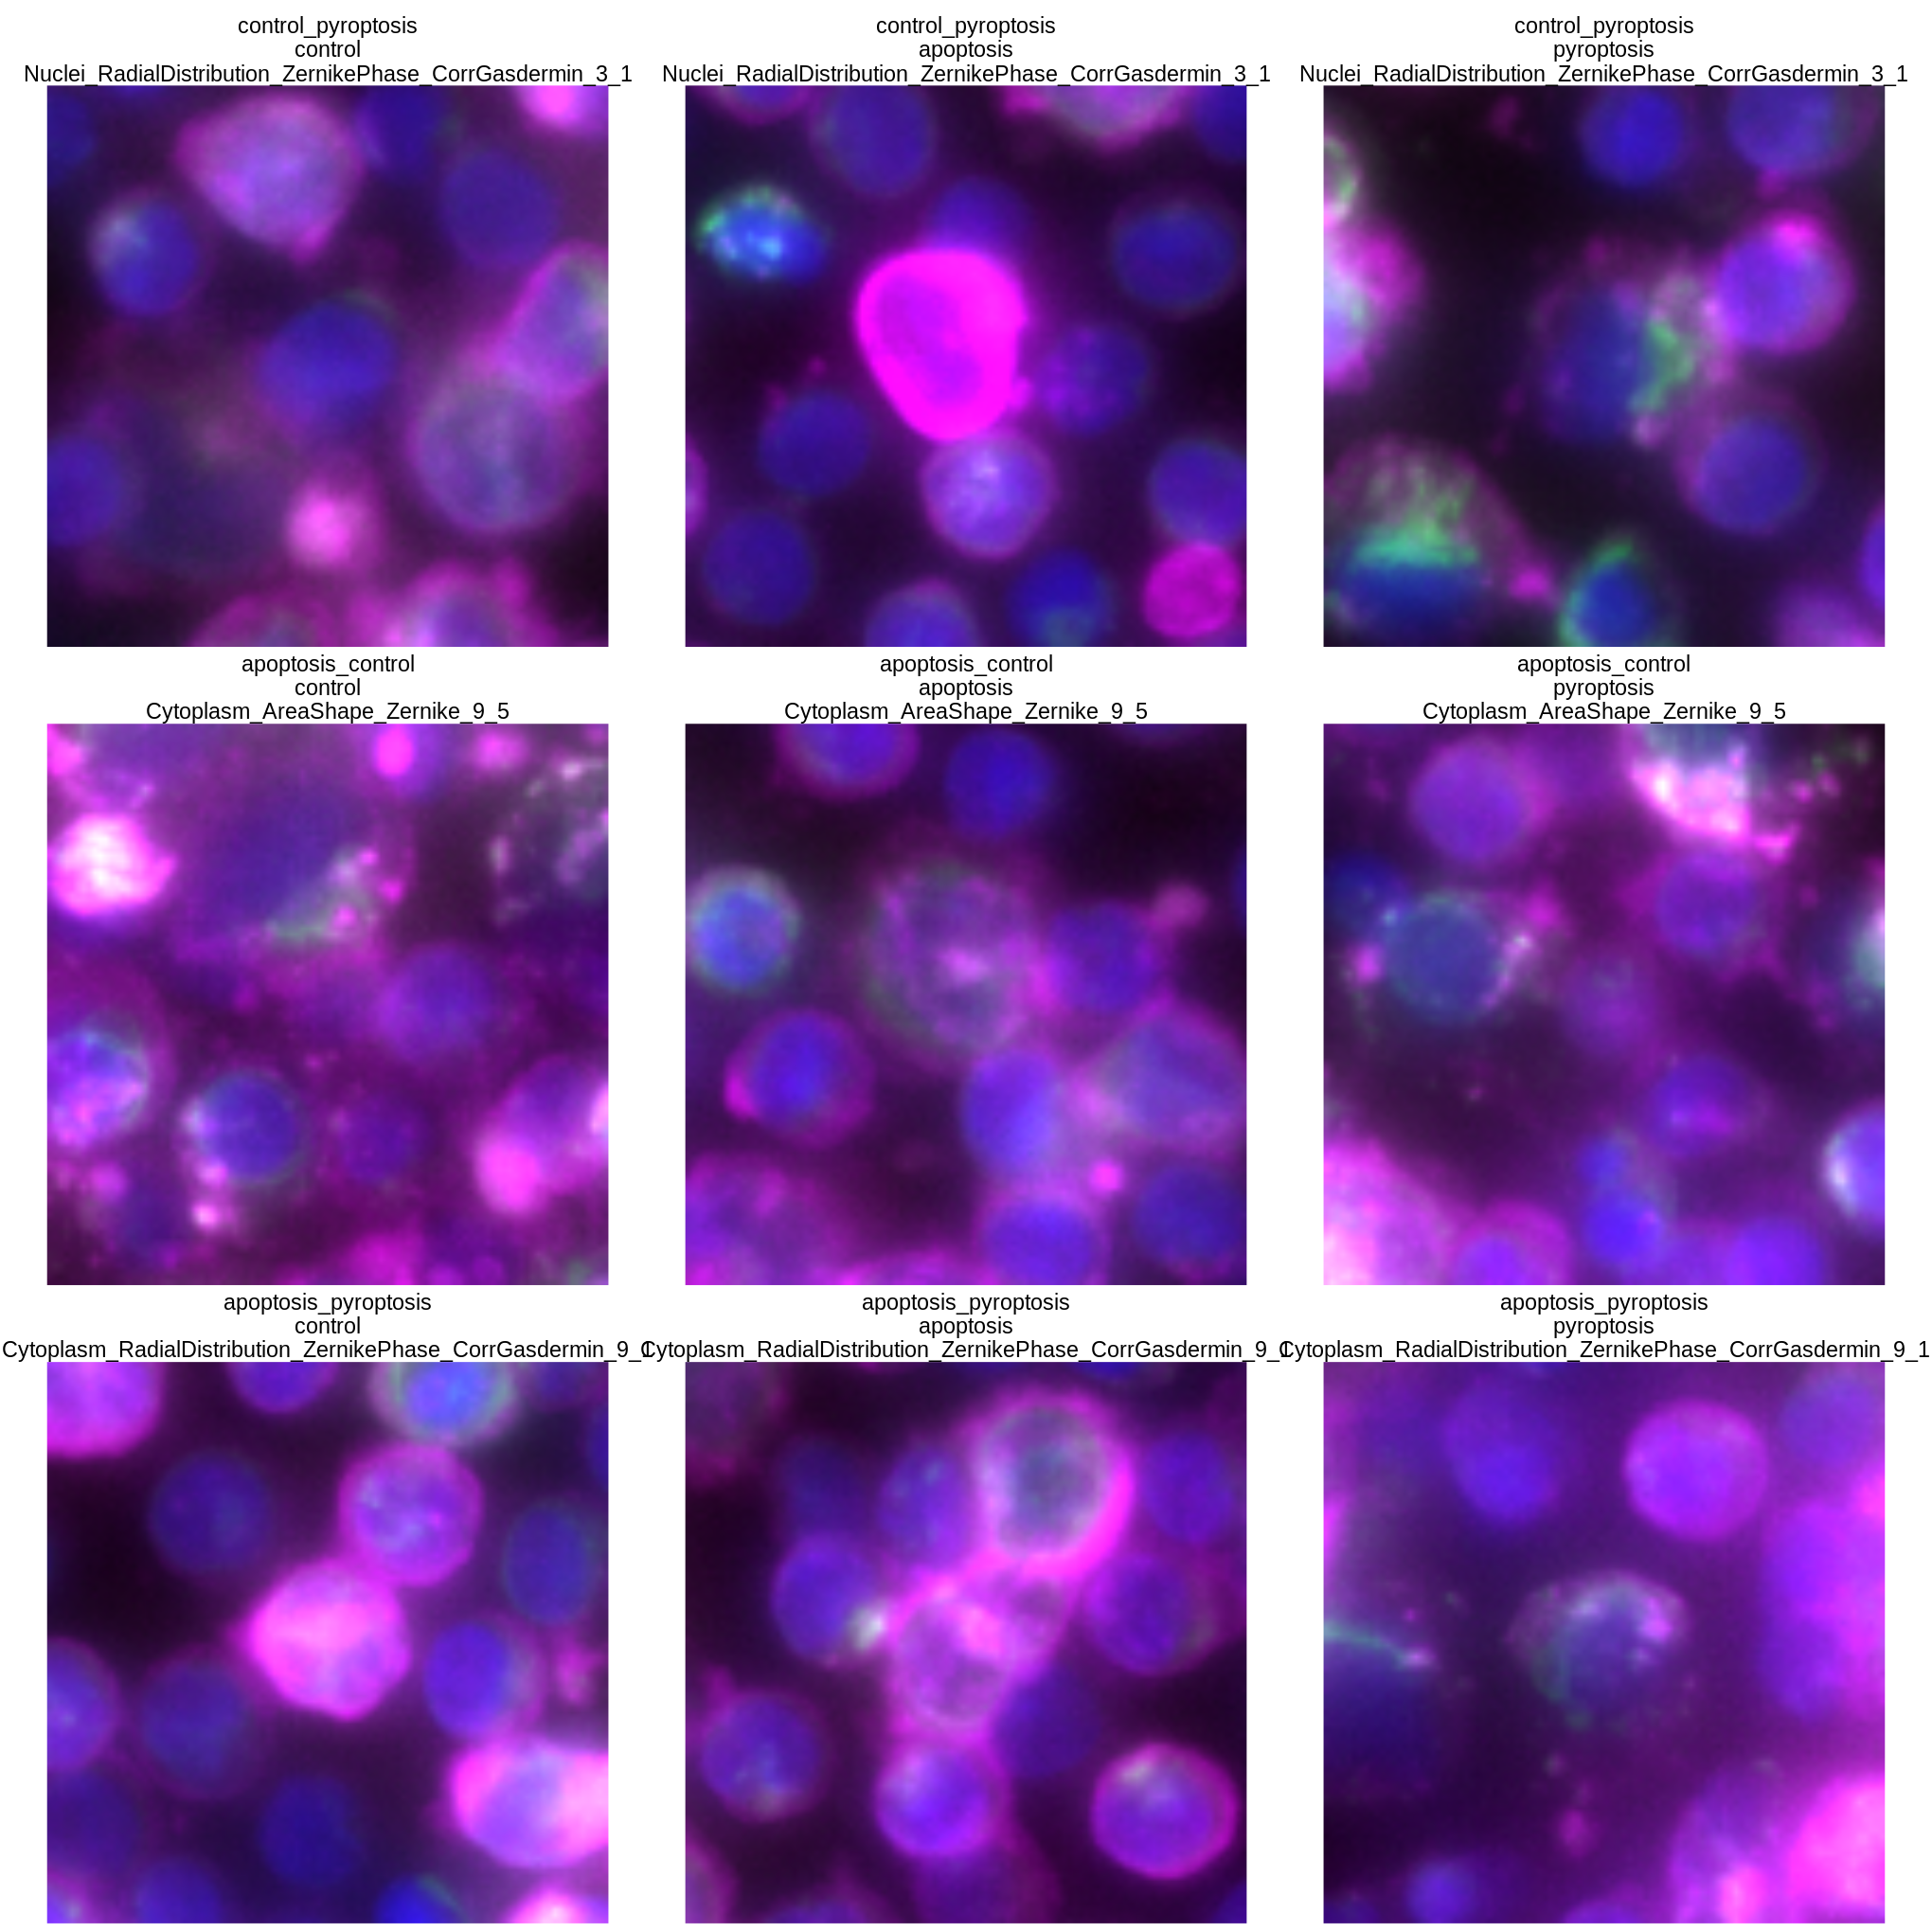

In [13]:
width <- 17
height <-17
options(repr.plot.width = width, repr.plot.height = height)
# stich the images together
control_pyroptosis_images <- (
    # plot image with 
    ggplot_objects_control_pyroptosis[[1]]
    + ggplot_objects_control_pyroptosis[[2]]
    + ggplot_objects_control_pyroptosis[[3]]

    + ggplot_objects_apoptosis_control[[1]]
    + ggplot_objects_apoptosis_control[[2]]
    + ggplot_objects_apoptosis_control[[3]]

    + ggplot_objects_apoptosis_pyroptosis[[1]]
    + ggplot_objects_apoptosis_pyroptosis[[2]]
    + ggplot_objects_apoptosis_pyroptosis[[3]]
   
    + plot_layout(ncol = 3)
)
control_pyroptosis_images
# save the image
# ggsave(
#     file.path(
#         paste0(
#             "../figures/Multi_Class/",model_name,"/",cell_type,"/correct_class_images.png"
#         )
#     ),
#     correct_class_images, width = width, height = height, dpi = 600
# )